In [72]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole

# Basic descriptors - Introduction

[Descriptors](https://en.wikipedia.org/wiki/Molecular_descriptor) are numeric or boolean ways of representing molecule properties. They can be simple structural properties such as the count of rings we did in the last two exercises, count of rotatable bonds within a molecule, or count of all non-hydrogen atoms, count of hydrogen bond acceptors and donors, a boolean value representing the presence of a specific group or substructure in the molecule, etc. Physico-chemical properties are also often used as descriptors: molecular weight, topological [polar surface area](https://en.wikipedia.org/wiki/Polar_surface_area), polarizability, refractivity, octanol-water [partition coefficient](https://en.wikipedia.org/wiki/Partition_coefficient), etc.

The aforementioned descriptor types are the most basic, but also very frequently used types. Classics aside, there are literally hundreds of various documented descriptors, involving even stuff like quantum-chemical computation or structural elasticity. In practice, a descriptor can be almost any quantifiable property of a molecule or its part, that carries useful information about that molecule.

A summary article on descriptors:
http://www.chemicke-listy.cz/docs/full/2017_11_716-723.pdf

The most used descriptors are already implemented in RDKit, and can be obtained by from RDKit Mol instances:

# What to do
 - have a look at the linked materials, also including [the article](http://www.chemicke-listy.cz/docs/full/2017_11_716-723.pdf) from the good ol' leaves. I am sure you were/will be told about descriptors at length from the actual lectures. For the purposes of this exercise, just please make sure you have some general notion of what a molecular descriptor is and what it can be used for
 - apply the aforedescribed methods onto your own dataset. How does DrugBank and mTOR compare to your dataset? Any comments/ideas? Also, if you do not have seaborn, just do "conda install seaborn" in your conda environment, it should sort itself out. If you have some other visualization preferences, with different graph styles and/or different libraries, you can use whatever you are comfortable with.
 - If you notice something interesting about your dataset, try to "zoom" onto the observed discrepancy using additional descriptors, their ratios or visualizations of your choosing. Here, it was the observed large amount of hydrogen bond acceptors followed by calculating heteroatom and heterocycle ratios. For your set, it might be something different. The whole point of this is you trying to follow and investigate the trends in your dataset. If you find everything in line with known drugs in DrugBank, congrats - your ligands seem pretty druglike. If that's the case, just try the heteroatom and heterocycle ratios ;)

# A story of cytochrome P450 receptor

In [91]:
# loading my cytochrome P450 dataset
import csv
with open('Cytochrome_P450_targets.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cytochr_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]
    
# loading mTOR for comparison
with open('chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

# loading Drugbank dataset    
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [20:13:48] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [20:34:59] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:34:59] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [20:35:00] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [20:35:00] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [20:34:59] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:35:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:35:00] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [20:35:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:35:00] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [20:35:00] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [20:35:00] ERROR: Explicit v

7113

well, that's our structures loaded as RDKit Mol instances. Let's try computing some descriptors for a randomly selected Mol instance:

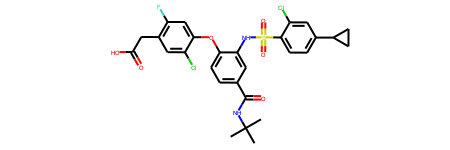

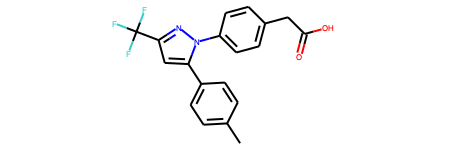

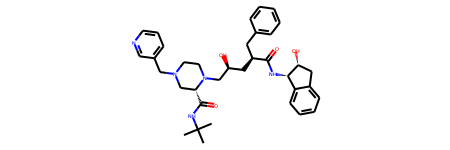

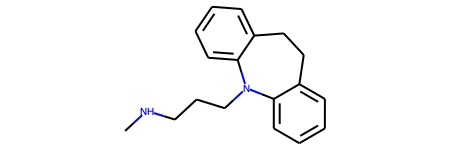

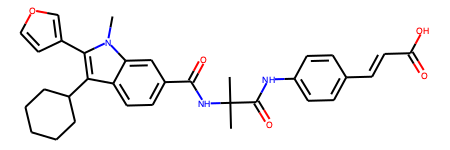

In [92]:
# let's select a ligand which we will use in this exercise
for i in range(105,110):
    display(cytochr_ligands[i])

In [93]:
# the ligand I've chosen is 4
l = 4

In [94]:
# count of rings:
Chem.GetSSSR(cytochr_ligands[l])

4

In [95]:
# count of rotatable bonds:
Chem.CalcNumRotatableBonds(cytochr_ligands[l])

4

In [60]:
# count of all heavy/non-hydrogen atoms
cytochr_ligands[l].GetNumHeavyAtoms()

32

In [61]:
# hydrogen bond acceptors / donors
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(cytochr_ligands[l]), rdescriptors.CalcNumLipinskiHBD(cytochr_ligands[l])

(6, 1)

In [62]:
# molecular weight
rdescriptors.CalcExactMolWt(cytochr_ligands[l])

479.18657566800005

In [63]:
# topological polar surface area
rdescriptors.CalcTPSA(cytochr_ligands[l])

73.74000000000001

In [64]:
# octanol-water partition coefficient
Descriptors.MolLogP(cytochr_ligands[l])

3.2670000000000012

This is about as much as we will need today, there are many more descriptors. Some [more](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) are in the [RDKit docs](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html). Let's do the current descriptors for the entire set, and load them into a pandas dataframe. This might take a while :)

In [74]:
# Cytochrome P450
cytc_rings = [Chem.GetSSSR(l) for l in cytochr_ligands]
cytc_rotatable = [Chem.CalcNumRotatableBonds(l) for l in cytochr_ligands]
cytc_atomcount = [l.GetNumHeavyAtoms() for l in cytochr_ligands]
cytc_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in cytochr_ligands]
cytc_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in cytochr_ligands]
cytc_molwt = [rdescriptors.CalcExactMolWt(l) for l in cytochr_ligands]
cytc_tpsa = [rdescriptors.CalcTPSA(l) for l in cytochr_ligands]
cytc_logp = [Descriptors.MolLogP(l) for l in cytochr_ligands]

# mTOR
mtor_rings = [Chem.GetSSSR(l) for l in mtor_ligands]
mtor_rotatable = [Chem.CalcNumRotatableBonds(l) for l in mtor_ligands]
mtor_atomcount = [l.GetNumHeavyAtoms() for l in mtor_ligands]
mtor_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in mtor_ligands]
mtor_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in mtor_ligands]
mtor_molwt = [rdescriptors.CalcExactMolWt(l) for l in mtor_ligands]
mtor_tpsa = [rdescriptors.CalcTPSA(l) for l in mtor_ligands]
mtor_logp = [Descriptors.MolLogP(l) for l in mtor_ligands]

# drugbank
drugbank_rings = [Chem.GetSSSR(l) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

In [75]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs

In [76]:
df_cyt = pd.DataFrame(data={'set':'cyt', 'rings': cytc_rings,
                        'rotatable': cytc_rotatable, 'atoms': cytc_atomcount,
                        'hba': cytc_hba, 'hbd': cytc_hbd, 'molwt': cytc_molwt,
                        'tpsa': cytc_tpsa, 'logp': cytc_logp})
df_cyt.head()

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,cyt,3,6,26,8,2,355.164440,102.16,1.22214
1,cyt,4,4,27,8,1,368.083330,94.30,2.84210
2,cyt,3,7,32,9,2,464.152969,111.95,0.22680
3,cyt,3,5,26,4,1,350.143056,51.22,4.38730
4,cyt,4,4,32,6,1,479.186576,73.74,3.26700


In [77]:
df_mtor = pd.DataFrame(data={'set':'mtor', 'rings': mtor_rings,
                        'rotatable': mtor_rotatable, 'atoms': mtor_atomcount,
                        'hba': mtor_hba, 'hbd': mtor_hbd, 'molwt': mtor_molwt,
                        'tpsa': mtor_tpsa, 'logp': mtor_logp})
df_mtor.head()

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,mtor,4,5,30,8,2,443.052210,113.94,3.65160
1,mtor,4,5,28,6,1,390.115047,77.00,4.59912
2,mtor,4,6,29,7,1,406.109961,86.23,4.29930
3,mtor,4,5,30,8,2,443.052210,113.94,3.65160
4,mtor,4,5,31,8,1,457.067860,105.15,3.67590


In [79]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp})
df_drugbank.head()

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900


Ok, that's already a nice hefty table. Let's visualize the values, maybe some [boxplots](https://en.wikipedia.org/wiki/Box_plot)?

In [80]:
concat_df = pd.concat([df_cyt, df_mtor, df_drugbank], ignore_index=True)
concat_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,cyt,3,6,26,8,2,355.164440,102.16,1.22214
1,cyt,4,4,27,8,1,368.083330,94.30,2.84210
2,cyt,3,7,32,9,2,464.152969,111.95,0.22680
3,cyt,3,5,26,4,1,350.143056,51.22,4.38730
4,cyt,4,4,32,6,1,479.186576,73.74,3.26700
...,...,...,...,...,...,...,...,...,...
17545,drugs,1,0,8,1,1,128.002892,20.23,2.04560
17546,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
17547,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
17548,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [89]:
melted_df = pd.melt(concat_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

,set,variable,value
0,cyt,rings,3.0000
1,cyt,rings,4.0000
2,cyt,rings,3.0000
3,cyt,rings,3.0000
4,cyt,rings,4.0000
...,...,...,...
105295,drugs,logp,2.0456
105296,drugs,logp,-1.3227
105297,drugs,logp,1.5471
105298,drugs,logp,-0.0003


<AxesSubplot:xlabel='variable', ylabel='value'>

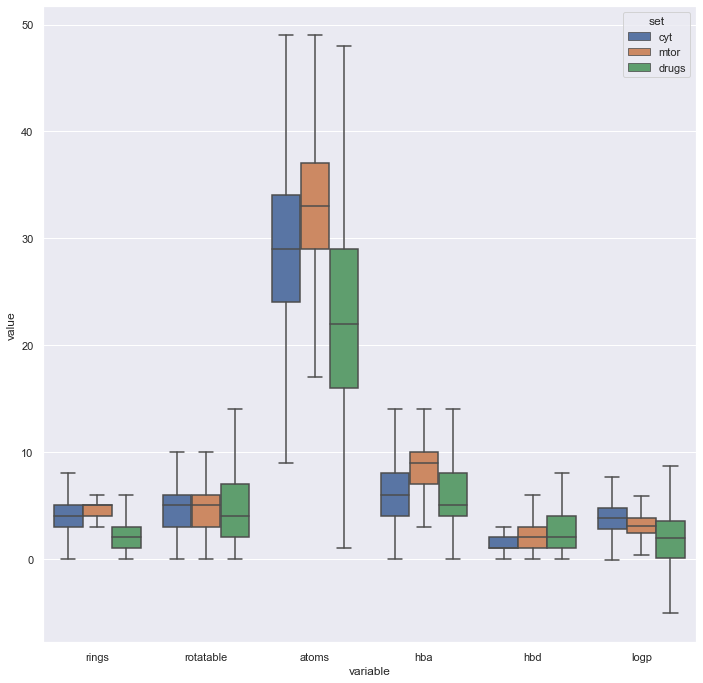

In [90]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False)

In [86]:
melted_df2 = pd.melt(concat_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,cyt,molwt,355.164440
1,cyt,molwt,368.083330
2,cyt,molwt,464.152969
3,cyt,molwt,350.143056
4,cyt,molwt,479.186576
...,...,...,...
35095,drugs,tpsa,20.230000
35096,drugs,tpsa,149.820000
35097,drugs,tpsa,403.100000
35098,drugs,tpsa,83.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

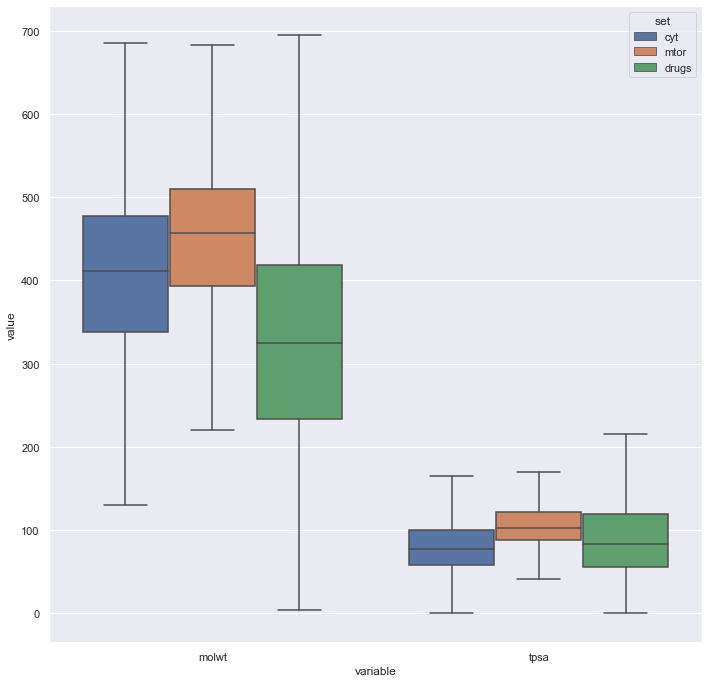

In [87]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False)

In comparison to known therapeutic substances in DrugBank, our set of mTOR ligands tends to have structures with many more rings, well beyond the third quartile ring count in DrugBank. The numberof rings in cytochrome P450 dataset is higher than the third quartile ring count in DrugBank. Molecular weight is a little bit higher compare to Drugbank molecules but lower compare to mtor.